# Analysis of refugees in Spain

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Datos sacados de [Kaggle](https://www.kaggle.com/datasets/mariablancogonzalez/refugee-requests-in-spain)

In [3]:
data = pd.read_csv('AsiloEspaa.csv')

In [4]:
data = pd.DataFrame(data)

Check missing values


In [5]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Unnamed: 0,0
Nacionalidad,0
Hombres,0
Mujeres,0
Total,0
Admitidas,0
Año,0


Do total of received refugee requests

In [31]:
data['Total']= data['Mujeres'] + data['Hombres']

Nacionalidad 
afganistan      2477
albania          472
alemania           6
angola           190
apatrida          30
               ...  
venezuela     120730
vietnam          231
yemen           1457
zambia             3
zimbabwe           6
Name: Total, Length: 154, dtype: int64

From which countries has Spain received and admitted the highest number of refugees?

In [50]:
country_data = data.groupby('Nacionalidad ')[['Admitidas', 'Total']].sum().reset_index().sort_values(by='Admitidas')
country_data

,Nacionalidad,Admitidas,Total
0,afganistan,2044,2477
1,albania,204,472
2,alemania,0,6
3,angola,111,190
4,apatrida,7,30
...,...,...,...
149,venezuela,48715,120730
150,vietnam,90,231
151,yemen,817,1457
152,zambia,3,3


<Axes: xlabel='Nacionalidad '>

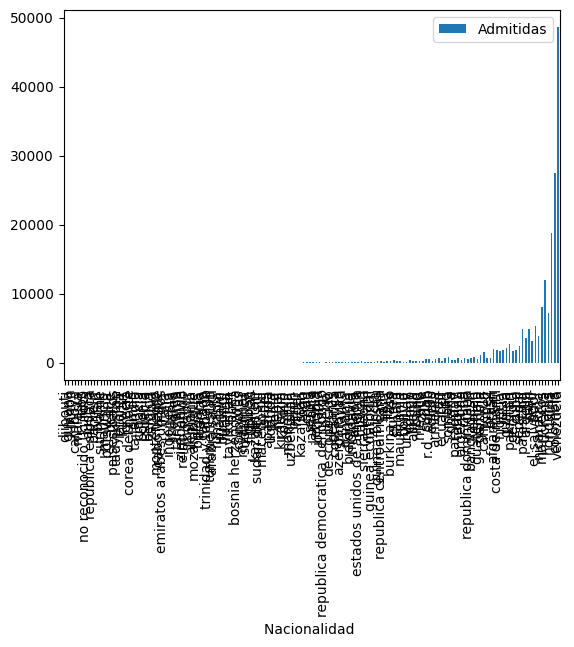

In [65]:
country_admitted = country_data.sort_values(by='Total',ascending=False)
country_admitted.plot(kind='bar', x='Nacionalidad ', y='Admitidas')

What are the general trends in refugee statistics from 2012-2021?

In [39]:
yrly = data.groupby('Año')[['Admitidas', 'Total']].sum().reset_index().sort_values(by='Año')
yrly.reset_index(drop=True)

,Año,Admitidas,Total
0,2012,1117,1426
1,2013,3917,4513
2,2014,4896,5950
3,2015,13539,14887
4,2016,15245,16544
5,2017,29343,31740
6,2018,47740,55749
7,2019,1659,118397
8,2020,4333,88840
9,2021,65017,65589


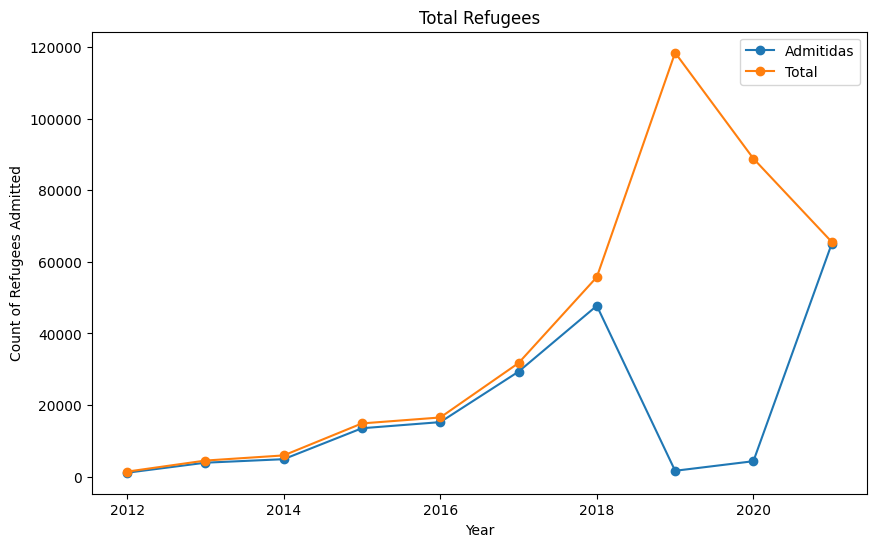

In [45]:
plt.figure(figsize=(10, 6))

plt.plot(yrly['Año'], yrly['Admitidas'], marker='o', label='Admitidas')
plt.plot(yrly['Año'], yrly['Total'], marker='o', label='Total')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count of Refugees Admitted')
plt.title('Total Refugees')
plt.legend()

plt.show()

In [41]:
yrly_gender = data.groupby('Año')[['Hombres', 'Mujeres', 'Admitidas']].sum().reset_index()
yrly_gender

,Año,Hombres,Mujeres,Admitidas
0,2012,1051,375,1117
1,2013,3528,985,3917
2,2014,4027,1923,4896
3,2015,9057,5830,13539
4,2016,9826,6718,15245
5,2017,18271,13469,29343
6,2018,31964,23785,47740
7,2019,64595,53802,1659
8,2020,47104,41736,4333
9,2021,41988,23601,65017


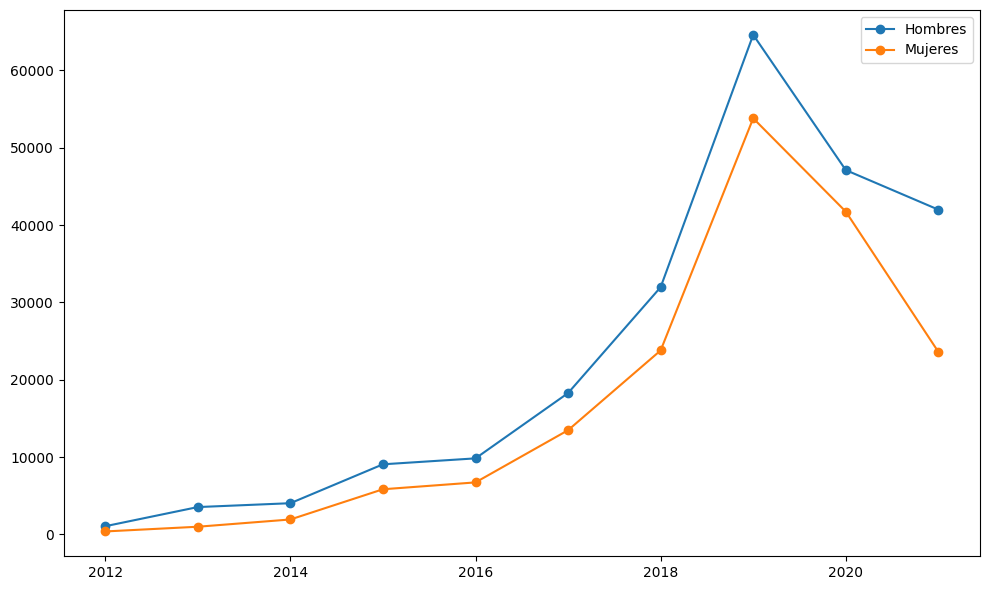

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(yrly_gender['Año'], yrly_gender['Hombres'], label='Hombres', marker='o')
plt.plot(yrly_gender['Año'], yrly_gender['Mujeres'], label='Mujeres', marker='o')

plt.tight_layout()
plt.legend()
plt.show()

hacerlo por comunidad autonoma

hacer una prediccion de cuantos en el futuro?